In [2]:
import pandas as pd
import hvplot.pandas
import holoviews as hv
import numpy as np
from holoviews import opts
import panel as pn
pn.extension()
hv.extension('bokeh')
import geopandas as gpd
from shapely.geometry import Point
import folium
import branca.colormap as cm
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Define the folder path and file name
data_csv_file="data/commute/CSVLog_20240826_062554.CSV"

output_folder_path = 'output/date/analysis_20240826_am/'  # Change this to your folder path

df_file_name = "df.csv"
df_file_path = os.path.join(output_folder_path, df_file_name)
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
#create folder folder if it does not exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

In [4]:
df=pd.read_csv(data_csv_file)
df.columns = df.columns.str.strip()
df_file_path = os.path.join(output_folder_path, df_file_name)
df.to_csv(df_file_path, index=False)
#df.head()

In [5]:
column_list=df.columns.tolist()
print(column_list)

['Time (sec)', 'Instant fuel economy (MPG)', 'Calculated load value (%)', 'Engine coolant temperature (°F)', 'Intake manifold absolute pressure (inHg)', 'Engine RPM (RPM)', 'Vehicle speed (MPH)', 'Relative throttle position (%)', 'Ambient air temperature (°F)', 'Relative accelerator pedal position (%)', 'Engine oil temperature (°F)', 'Intake air temperature bank 1  sensor 1 (°F)', 'Mass air flow rate (lb/min)', 'Boost (psi)', 'Engine Power (hp)', 'Engine Torque (lb•ft)', 'Trip Distance (miles)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)']


In [6]:
df=df[['Time (sec)', 'Vehicle speed (MPH)', 'Relative accelerator pedal position (%)','Engine RPM (RPM)', 'Boost (psi)', 'Engine Power (hp)','Mass air flow rate (lb/min)','Intake manifold absolute pressure (inHg)', 'Ambient air temperature (°F)','Trip Distance (miles)','Instant fuel economy (MPG)', 'Trip Fuel Economy (MPG)', 'Latitude (deg)', 'Longitude (deg)','Relative throttle position (%)']]
df.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%)
0,0.000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.985060,0.000000
1,0.965,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.985060,0.000000
2,2.004,0.0,0.0,721.5,-9.862566,3.877163,0.000000,9.449632,80.6,0.0,0.0,0.0,45.036170,-92.985060,3.137255
3,2.968,0.0,0.0,716.0,-9.862566,3.599360,0.381038,9.154331,80.6,0.0,0.0,0.0,45.036167,-92.985054,3.137255
4,4.002,0.0,0.0,713.5,-9.862566,3.575203,0.374833,9.154331,80.6,0.0,0.0,0.0,45.036167,-92.985054,3.137255


In [7]:
# To avoid math errors in situations where values = 0
df['Boost (psi)'] = df['Boost (psi)'].bfill().infer_objects()
df.loc[df['Boost (psi)'] == 0, 'Boost (psi)'] = 0.01

df.head()


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),Latitude (deg),Longitude (deg),Relative throttle position (%)
0,0.000,0.0,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.985060,0.000000
1,0.965,0.0,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,45.036170,-92.985060,0.000000
2,2.004,0.0,0.0,721.5,-9.862566,3.877163,0.000000,9.449632,80.6,0.0,0.0,0.0,45.036170,-92.985060,3.137255
3,2.968,0.0,0.0,716.0,-9.862566,3.599360,0.381038,9.154331,80.6,0.0,0.0,0.0,45.036167,-92.985054,3.137255
4,4.002,0.0,0.0,713.5,-9.862566,3.575203,0.374833,9.154331,80.6,0.0,0.0,0.0,45.036167,-92.985054,3.137255


In [8]:
def clean_data(df):
    # Round columns 'Time (sec)', ' Engine RPM (RPM)' and 2 other columns (Number of decimals: 0)
    df = df.round({'Time (sec)': 0, 'Engine RPM (RPM)': 0, 'Engine Power (hp)': 0, 'Time (sec)': 0})
    # Round columns ' Instant fuel economy (MPG)', ' Vehicle speed (MPH)' and 4 other columns (Number of decimals: 1)
    df = df.round({'Instant fuel economy (MPG)': 1, 'Vehicle speed (MPH)': 1,'Relative throttle position (%)': 1, 'Relative accelerator pedal position (%)': 1, 'Trip Distance (miles)': 1, 'Trip Fuel Economy (MPG)': 1,'Boost (psi)':1})
    # Round columns ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)', ' Bearing (deg)' (Number of decimals: 2)
    df = df.round({'Intake manifold absolute pressure (inHg)': 2, 'Mass air flow rate (lb/min)': 2,'Bearing (deg)': 2})
    # Drop columns: ' Intake manifold absolute pressure (inHg)', ' Mass air flow rate (lb/min)' and 3 other columns
    df = df.drop(columns=['Relative throttle position (%)'])
    # Rename column 'Latitude (deg)' to 'latitude'
    df = df.rename(columns={'Latitude (deg)': 'latitude'})
    # Rename column 'Longitude (deg)' to 'longitude'
    df = df.rename(columns={'Longitude (deg)': 'longitude'})
    return df

df_clean = clean_data(df.copy())
df_clean.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.985060
1,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.985060
2,2.0,0.0,0.0,722.0,-9.9,4.0,0.00,9.45,80.6,0.0,0.0,0.0,45.036170,-92.985060
3,3.0,0.0,0.0,716.0,-9.9,4.0,0.38,9.15,80.6,0.0,0.0,0.0,45.036167,-92.985054
4,4.0,0.0,0.0,714.0,-9.9,4.0,0.37,9.15,80.6,0.0,0.0,0.0,45.036167,-92.985054


In [9]:
#create dataframe where vehicle is stationary
df_stationary = df_clean[df_clean['Vehicle speed (MPH)'] == 0]
df_stationary.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.985060
1,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,45.036170,-92.985060
2,2.0,0.0,0.0,722.0,-9.9,4.0,0.00,9.45,80.6,0.0,0.0,0.0,45.036170,-92.985060
3,3.0,0.0,0.0,716.0,-9.9,4.0,0.38,9.15,80.6,0.0,0.0,0.0,45.036167,-92.985054
4,4.0,0.0,0.0,714.0,-9.9,4.0,0.37,9.15,80.6,0.0,0.0,0.0,45.036167,-92.985054


In [10]:
#creates dataframe where the vehicle is moving or is about to begin motion after being stationary
df_clean['next_mph'] = df_clean['Vehicle speed (MPH)'].shift(-1)
mask = (df_clean['Vehicle speed (MPH)'] > 0) | ((df_clean['Vehicle speed (MPH)'] == 0) & (df_clean['next_mph'] > 0))
df_moving= df_clean[mask].drop(columns=['next_mph'])
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude
10,10.0,0.0,3.9,1419.0,-7.0,14.0,0.61,15.06,80.6,0.0,0.0,0.0,45.036083,-92.98504
11,11.0,6.2,0.0,1245.0,-8.3,12.0,1.02,12.40,80.6,0.0,7.0,3.3,45.036053,-92.98501
12,12.0,6.2,0.0,1090.0,-10.4,5.0,0.57,7.97,80.6,0.0,16.4,4.9,45.036037,-92.98497
13,13.0,5.6,0.0,816.0,-10.0,5.0,0.56,8.86,80.6,0.0,14.8,5.5,45.036040,-92.98494
14,14.0,3.7,5.1,2074.0,-0.9,34.0,1.36,27.46,80.6,0.0,1.5,4.8,45.036045,-92.98492


In [11]:
#experimenting 
df_moving['Mass Air/Boost']=df_moving['Mass air flow rate (lb/min)']/df_moving['Boost (psi)']
df_moving['Mass Air/manPress']=df_moving['Mass air flow rate (lb/min)']/df_moving['Intake manifold absolute pressure (inHg)']
df_moving.head()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
10,10.0,0.0,3.9,1419.0,-7.0,14.0,0.61,15.06,80.6,0.0,0.0,0.0,45.036083,-92.98504,-0.087143,0.040505
11,11.0,6.2,0.0,1245.0,-8.3,12.0,1.02,12.40,80.6,0.0,7.0,3.3,45.036053,-92.98501,-0.122892,0.082258
12,12.0,6.2,0.0,1090.0,-10.4,5.0,0.57,7.97,80.6,0.0,16.4,4.9,45.036037,-92.98497,-0.054808,0.071518
13,13.0,5.6,0.0,816.0,-10.0,5.0,0.56,8.86,80.6,0.0,14.8,5.5,45.036040,-92.98494,-0.056000,0.063205
14,14.0,3.7,5.1,2074.0,-0.9,34.0,1.36,27.46,80.6,0.0,1.5,4.8,45.036045,-92.98492,-1.511111,0.049527


In [12]:
#creates dataframe where vehicle is moving and speed is less than 10mph
mask = (df_moving['Vehicle speed (MPH)'] <= 10)
df_less_10 = df_moving[mask]
#df_less_10.head()
df_less_10.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1451.828571,7.040000,2.491429,1151.800000,-8.700000,7.600000,0.750571,11.769143,8.060000e+01,25.362857,18.965714,23.457143,44.896942,-93.273025,-0.227841,0.062542
std,731.591516,2.461492,4.254919,411.532202,3.224082,8.339135,0.547679,6.543571,4.325497e-14,12.869163,9.527852,9.840411,0.070586,0.146174,0.498521,0.019365
min,10.000000,0.000000,0.000000,716.000000,-11.600000,3.000000,0.340000,5.910000,8.060000e+01,0.000000,0.000000,0.000000,44.860477,-93.349150,-2.560000,0.040505
25%,1744.500000,6.200000,0.000000,899.500000,-11.000000,4.000000,0.405000,7.090000,8.060000e+01,31.400000,14.950000,28.200000,44.860490,-93.348210,-0.096311,0.051385
50%,1760.000000,7.500000,0.000000,960.000000,-9.900000,5.000000,0.510000,9.150000,8.060000e+01,31.400000,19.300000,28.200000,44.864094,-93.342125,-0.054808,0.053856
75%,1860.500000,9.000000,3.500000,1315.000000,-7.450000,7.000000,0.770000,14.320000,8.060000e+01,32.000000,25.500000,28.400000,44.864124,-93.341900,-0.037302,0.067908
max,1869.000000,9.900000,15.700000,2436.000000,-0.900000,44.000000,2.560000,27.460000,8.060000e+01,32.000000,34.500000,28.400000,45.036083,-92.984830,-0.029565,0.120219


In [13]:
#creates dataframe where vehicle is moving and speed is between 10 and 20mph
mask = (df_moving['Vehicle speed (MPH)'] >= 10) & (df_moving['Vehicle speed (MPH)'] <= 20)
df_10_20 = df_moving[mask]
#df_10_20.head()
df_10_20.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1756.957746,15.578873,3.338028,1325.887324,-8.301408,11.985915,1.014507,12.606056,8.060000e+01,30.819718,31.195775,27.638028,44.866453,-93.335183,inf,0.074676
std,299.660305,2.533993,5.254804,373.878152,3.886772,13.484905,0.939509,7.887909,5.724800e-14,5.279600,16.671973,3.820111,0.029033,0.060067,NaN,0.018167
min,17.000000,10.600000,0.000000,844.000000,-11.700000,3.000000,0.360000,5.610000,8.060000e+01,0.000000,2.800000,4.100000,44.860160,-93.351710,-3.488889,0.046189
25%,1779.500000,13.350000,0.000000,1150.500000,-10.800000,5.000000,0.500000,7.530000,8.060000e+01,31.500000,17.500000,28.200000,44.860350,-93.346090,-0.113933,0.067247
50%,1819.000000,16.200000,0.000000,1222.000000,-10.000000,7.000000,0.690000,9.150000,8.060000e+01,31.800000,32.300000,28.300000,44.860367,-93.345000,-0.055769,0.070461
75%,1836.500000,17.400000,5.900000,1369.500000,-8.100000,13.000000,1.040000,12.990000,8.060000e+01,31.900000,43.900000,28.300000,44.863357,-93.343377,-0.044594,0.076212
max,1854.000000,19.900000,26.300000,2854.000000,6.400000,80.000000,6.210000,42.230000,8.060000e+01,31.900000,77.200000,28.500000,45.035946,-92.984870,inf,0.151458


In [14]:
#creates dataframe where vehicle is moving and speed is between 20 and 30mph
mask = (df_moving['Vehicle speed (MPH)'] >= 20) & (df_moving['Vehicle speed (MPH)'] <= 30)
df_20_30 = df_moving[mask]
#df_20_30.head()
df_20_30.describe()


,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1460.596491,25.285965,2.800000,1419.807018,-7.305263,16.842105,1.411228,14.594912,8.060000e+01,25.975439,50.677193,24.389474,44.893341,-93.284224,0.261669,0.085272
std,669.823907,3.196563,4.476247,334.088495,5.802352,21.780389,1.516390,11.839188,1.433718e-14,12.061128,33.052675,8.626344,0.066112,0.139295,1.179725,0.022144
min,18.000000,20.500000,0.000000,1184.000000,-11.900000,4.000000,0.380000,5.320000,8.060000e+01,0.000000,2.300000,3.500000,44.860420,-93.351906,-1.543750,0.068789
25%,1726.000000,22.400000,0.000000,1225.000000,-11.200000,5.000000,0.490000,6.790000,8.060000e+01,31.300000,23.200000,28.200000,44.862610,-93.349660,-0.051818,0.071816
50%,1766.000000,24.900000,0.000000,1257.000000,-10.900000,5.000000,0.530000,7.090000,8.060000e+01,31.500000,56.900000,28.300000,44.864063,-93.346565,-0.045455,0.073903
75%,1791.000000,28.000000,5.500000,1549.000000,-4.400000,17.000000,2.090000,20.670000,8.060000e+01,31.600000,74.300000,28.400000,44.864124,-93.345726,-0.034188,0.093988
max,1810.000000,29.800000,16.500000,2918.000000,10.400000,126.000000,8.310000,50.500000,8.060000e+01,31.800000,115.800000,28.500000,45.035830,-92.984880,7.175000,0.168077


In [15]:
#creates dataframe where vehicle is moving and speed is between 30 and 40mph
mask = (df_moving['Vehicle speed (MPH)'] >= 30) & (df_moving['Vehicle speed (MPH)'] <= 40)
df_30_40 = df_moving[mask]
#df_30_40.head()
df_30_40.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1489.846154,33.292308,4.200000,1639.307692,-6.346154,26.230769,1.919231,16.559231,8.060000e+01,26.600000,57.900000,24.800000,44.889746,-93.293051,0.024107,0.090944
std,649.216688,3.514603,8.177917,782.650240,7.327985,43.478259,2.701371,14.821152,1.479113e-14,11.763007,36.150818,8.633172,0.064490,0.136436,0.387896,0.034659
min,29.000000,30.400000,0.000000,1258.000000,-11.300000,4.000000,0.490000,6.500000,8.060000e+01,0.100000,3.500000,5.300000,44.861390,-93.351900,-0.352174,0.073193
25%,1716.000000,30.400000,0.000000,1286.000000,-10.900000,5.000000,0.550000,7.380000,8.060000e+01,31.200000,28.600000,28.200000,44.862003,-93.351875,-0.087912,0.074526
50%,1719.000000,31.700000,0.000000,1305.000000,-10.700000,7.000000,0.700000,7.680000,8.060000e+01,31.200000,63.400000,28.200000,44.864502,-93.345730,-0.050459,0.075385
75%,1796.000000,36.700000,3.900000,1402.000000,-5.100000,15.000000,1.620000,19.190000,8.060000e+01,31.600000,89.800000,28.500000,44.864918,-93.345726,-0.047273,0.085982
max,1801.000000,39.100000,22.400000,3436.000000,9.300000,126.000000,9.270000,48.130000,8.060000e+01,31.700000,100.300000,28.500000,45.035034,-92.985550,1.018681,0.193771


In [16]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 40) & (df_moving['Vehicle speed (MPH)'] <= 50)
df_40_50 = df_moving[mask]
#df_40_50.head()
df_40_50.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.400000e+01,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1111.071429,46.878571,5.071429,1862.928571,-4.642857,36.571429,3.275714,19.933571,8.060000e+01,20.064286,81.900000,20.221429,44.926130,-93.220873,0.550025,0.120776
std,833.883359,2.984622,7.302100,721.969258,8.972412,44.330428,3.772065,18.105298,1.474730e-14,15.395884,65.407069,11.387184,0.084155,0.181130,1.110326,0.053644
min,31.000000,41.000000,0.000000,1261.000000,-11.700000,4.000000,0.410000,5.610000,8.060000e+01,0.100000,4.400000,5.300000,44.865166,-93.351620,-0.133333,0.073084
25%,34.250000,46.150000,0.000000,1412.750000,-11.575000,4.250000,0.505000,5.982500,8.060000e+01,0.200000,8.150000,5.600000,44.865520,-93.351022,-0.051532,0.083380
50%,1707.500000,47.850000,0.000000,1481.000000,-10.450000,8.000000,0.710000,8.270000,8.060000e+01,31.100000,88.800000,28.400000,44.866059,-93.350593,-0.037607,0.085945
75%,1710.750000,49.100000,11.400000,2219.000000,5.900000,81.250000,7.660000,41.195000,8.060000e+01,31.100000,146.200000,28.400000,45.034890,-92.987070,1.065805,0.181136
max,1714.000000,49.700000,18.800000,3558.000000,9.900000,132.000000,9.780000,49.320000,8.060000e+01,31.200000,165.800000,28.400000,45.034985,-92.986115,3.958824,0.205308


In [17]:
mask = (df_moving['Vehicle speed (MPH)'] >= 50) & (df_moving['Vehicle speed (MPH)'] <= 60)
df_50_60 = df_moving[mask]
df_50_60.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,908.044444,56.902222,10.573333,2038.644444,-3.635556,33.444444,2.693556,22.095778,8.060000e+01,16.653333,63.617778,26.511111,45.035496,-93.273172,0.367179,0.113189
std,398.042652,2.970345,8.757656,484.805638,7.521519,28.283914,2.190800,15.277244,5.748574e-14,7.293665,56.859149,5.557150,0.073558,0.081548,3.062533,0.020438
min,36.000000,50.300000,0.000000,1523.000000,-11.900000,4.000000,0.510000,5.320000,8.060000e+01,0.200000,9.900000,5.700000,44.866550,-93.350470,-12.166667,0.089483
25%,798.000000,55.300000,0.000000,1772.000000,-11.300000,6.000000,0.680000,6.500000,8.060000e+01,14.800000,13.300000,27.800000,45.068680,-93.298645,-0.107292,0.102590
50%,812.000000,57.800000,14.500000,1945.000000,-4.500000,18.000000,2.020000,20.380000,8.060000e+01,15.000000,44.100000,28.000000,45.069080,-93.277930,-0.049138,0.106568
75%,872.000000,59.000000,16.900000,2165.000000,3.200000,62.000000,4.480000,36.030000,8.060000e+01,16.000000,127.500000,28.100000,45.069305,-93.273420,0.880000,0.122445
max,1705.000000,59.700000,25.100000,3782.000000,9.300000,82.000000,9.410000,48.430000,8.060000e+01,31.100000,170.700000,28.400000,45.069878,-92.987660,10.666667,0.218279


In [18]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 60) & (df_moving['Vehicle speed (MPH)'] <= 70)
df_60_70 = df_moving[mask]
#df_60_70.head()
df_60_70.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,968.759174,65.683333,7.305810,2053.199541,-3.091972,30.994648,2.772829,23.217446,8.060000e+01,17.635474,46.515979,26.803670,45.002901,-93.265450,inf,0.118580
std,480.040482,2.214976,5.965831,114.207247,4.851549,18.645137,1.239183,9.880195,1.563792e-12,8.863882,37.017490,2.823874,0.061045,0.115602,NaN,0.006936
min,39.000000,60.300000,0.000000,1782.000000,-11.700000,5.000000,0.600000,5.610000,8.060000e+01,0.300000,8.600000,7.300000,44.868095,-93.350900,-40.200000,0.104421
25%,568.750000,64.000000,0.000000,1990.000000,-6.700000,17.000000,1.847500,15.950000,8.060000e+01,10.400000,20.500000,26.600000,44.954253,-93.349470,-0.864062,0.114995
50%,1039.500000,65.900000,8.200000,2049.500000,-2.500000,27.000000,2.900000,24.510000,8.060000e+01,19.000000,33.250000,27.750000,45.035358,-93.340615,-0.196911,0.118327
75%,1371.250000,67.100000,11.800000,2105.000000,0.400000,44.000000,3.620000,30.420000,8.060000e+01,25.025000,52.200000,27.900000,45.054600,-93.184098,1.107192,0.121408
max,1698.000000,69.600000,27.500000,3582.000000,10.900000,106.000000,8.980000,51.680000,8.060000e+01,30.900000,155.900000,28.300000,45.070034,-92.988720,inf,0.207317


In [19]:
mask = (df_moving['Vehicle speed (MPH)'] >= 70)
df_grt_70 = df_moving[mask]
#df_grt_70.head()
df_grt_70.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,450.291667,71.598397,7.301923,2218.032051,-3.502564,33.057692,2.884551,22.384872,8.060000e+01,8.106410,44.581410,25.633654,45.055061,-93.141681,inf,0.128412
std,196.629006,1.221918,5.520945,61.340903,4.610661,18.087760,1.234084,9.387881,3.273747e-13,3.786975,33.598048,2.411786,0.012011,0.072860,NaN,0.003571
min,82.000000,70.200000,0.000000,2098.000000,-11.900000,7.000000,0.650000,5.320000,8.060000e+01,1.000000,12.500000,17.400000,45.035423,-93.308440,-38.400000,0.121774
25%,340.750000,70.800000,0.000000,2174.000000,-6.800000,19.750000,1.995000,15.650000,8.060000e+01,5.975000,21.400000,26.200000,45.042590,-93.197192,-0.941406,0.125815
50%,458.500000,71.500000,8.600000,2214.500000,-2.950000,30.500000,2.980000,23.330000,8.060000e+01,8.250000,32.550000,26.400000,45.058828,-93.143068,-0.290441,0.128033
75%,600.250000,72.100000,11.400000,2258.000000,0.000000,47.000000,3.772500,29.530000,8.060000e+01,11.000000,50.100000,26.800000,45.066615,-93.102085,0.812440,0.130557
max,921.000000,74.600000,25.900000,2556.000000,7.100000,79.000000,6.360000,44.000000,8.060000e+01,16.900000,140.800000,27.500000,45.068510,-93.004810,inf,0.147530


In [20]:
#creates dataframe where vehicle is moving and speed is between 40 and 50mph
mask = (df_moving['Vehicle speed (MPH)'] >= 55) & (df_moving['Vehicle speed (MPH)'] <= 75)
df_55_75 = df_moving[mask]
#df_55_75.head()
df_55_75.describe()

,Time (sec),Vehicle speed (MPH),Relative accelerator pedal position (%),Engine RPM (RPM),Boost (psi),Engine Power (hp),Mass air flow rate (lb/min),Intake manifold absolute pressure (inHg),Ambient air temperature (°F),Trip Distance (miles),Instant fuel economy (MPG),Trip Fuel Economy (MPG),latitude,longitude,Mass Air/Boost,Mass Air/manPress
count,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1.654000e+03,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000,1654.000000
mean,869.689238,66.650121,7.376360,2083.151149,-3.191475,31.423821,2.790248,23.015375,8.060000e+01,15.817956,46.503688,26.593229,45.013594,-93.242456,inf,0.120356
std,482.269723,3.306656,5.966092,131.034301,4.868445,18.794393,1.264100,9.913603,2.445006e-12,8.909319,36.928623,2.808757,0.059117,0.118319,NaN,0.008042
min,38.000000,55.300000,0.000000,1665.000000,-11.900000,5.000000,0.560000,5.320000,8.060000e+01,0.200000,8.600000,6.500000,44.867184,-93.350900,-40.200000,0.098139
25%,451.250000,64.600000,0.000000,2002.000000,-6.800000,17.000000,1.850000,15.650000,8.060000e+01,8.100000,20.500000,26.400000,44.975278,-93.348968,-0.893750,0.115480
50%,870.500000,66.500000,8.200000,2072.000000,-2.600000,28.000000,2.905000,24.210000,8.060000e+01,16.000000,33.200000,27.600000,45.037452,-93.298267,-0.200000,0.119590
75%,1288.750000,69.000000,11.800000,2158.750000,0.300000,44.000000,3.650000,30.120000,8.060000e+01,23.575000,52.200000,27.900000,45.061187,-93.140250,1.060616,0.124502
max,1702.000000,74.600000,27.500000,3582.000000,10.900000,106.000000,9.410000,51.680000,8.060000e+01,31.000000,155.900000,28.300000,45.070034,-92.988365,inf,0.218279


40-50mph
Average Boost: -4.64
Value Counts: 14
Values > 100mpg: 7
Values <= 100mpg: 7
Percent above 100mpg: 50.0%
Mean MPG: 81.9
mpg Quartiles
   Percentile  40-50mph (mpg)
0        0.25            8.15
1        0.50           88.80
2        0.75          146.20
Boost Quartiles
   Percentile  Value (psi)
0        0.25      -11.575
1        0.50      -10.450
2        0.75        5.900


<Axes: ylabel='Value (psi)'>

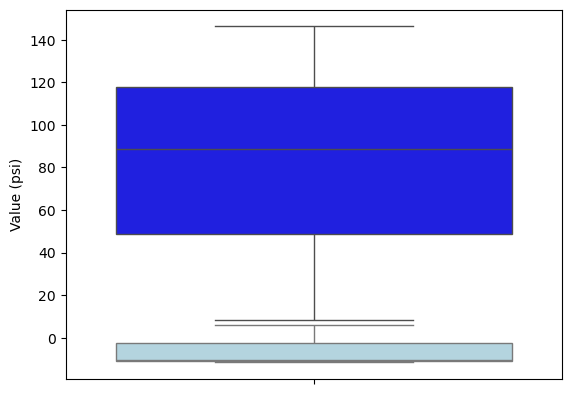

In [21]:
mask_grt_100 = df_40_50['Instant fuel economy (MPG)'] > 100
mpg_grt_100_40_50 = mask_grt_100.sum()
mask_lte_100 = df_40_50['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_40_50 = mask_lte_100.sum()

mph_40_50_boost_mean =df_40_50['Boost (psi)'].mean().round(2) 
mph_40_50_boost_quantiles=df_40_50['Boost (psi)'].quantile([0.25,0.50,0.75])
df_40_50_boost_quantiles = pd.DataFrame(mph_40_50_boost_quantiles)
df_40_50_boost_quantiles = df_40_50_boost_quantiles.reset_index()
df_40_50_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_40_50_count=len(df_40_50)
mpg_40_50_mpg_mean=df_40_50['Instant fuel economy (MPG)'].mean().round(2)
mpg_40_50_100_quantiles=df_40_50['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_40_50_100_per=((mpg_grt_100_40_50/mpg_40_50_count)*100).round(2)
df_40_50_100_quantiles = pd.DataFrame(mpg_40_50_100_quantiles)
df_40_50_100_quantiles = df_40_50_100_quantiles.reset_index()
df_40_50_100_quantiles.columns = ['Percentile', '40-50mph (mpg)']

print("40-50mph")
print(f"Average Boost: {mph_40_50_boost_mean}")
print(f"Value Counts: {mpg_40_50_count}")
print(f"Values > 100mpg: {mpg_grt_100_40_50}")
print(f"Values <= 100mpg: {mpg_lte_100_40_50}")
print(f"Percent above 100mpg: {mpg_40_50_100_per}%")
print(f"Mean MPG: {mpg_40_50_mpg_mean}")
print("mpg Quartiles")
print(df_40_50_100_quantiles)
print("Boost Quartiles")
print(df_40_50_boost_quantiles)
sns.boxplot(y=df_40_50_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_40_50_100_quantiles['40-50mph (mpg)'], color='blue')

50-60mph
Average Boost: -3.64
Value Counts: 45
Values > 100mpg: 16
Values <= 100mpg: 29
Percent above 100mpg: 35.56%
Mean MPG: 63.62
mpg Quartiles
   Percentile  50-60mph (mpg)
0        0.25            13.3
1        0.50            44.1
2        0.75           127.5
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -11.3
1        0.50         -4.5
2        0.75          3.2


<Axes: ylabel='Value (psi)'>

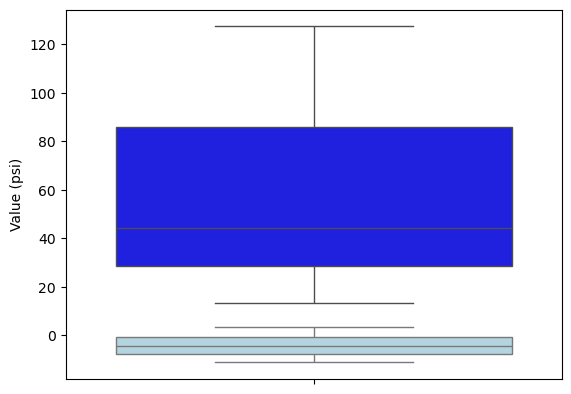

In [22]:
mask_grt_100 = df_50_60['Instant fuel economy (MPG)'] > 100
mpg_grt_100_50_60 = mask_grt_100.sum()
mask_lte_100 = df_50_60['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_50_60 = mask_lte_100.sum()

mph_50_60_boost_mean =df_50_60['Boost (psi)'].mean().round(2) 
mph_50_60_boost_quantiles=df_50_60['Boost (psi)'].quantile([0.25,0.50,0.75])
df_50_60_boost_quantiles = pd.DataFrame(mph_50_60_boost_quantiles)
df_50_60_boost_quantiles = df_50_60_boost_quantiles.reset_index()
df_50_60_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_50_60_count=len(df_50_60)
mpg_50_60_mpg_mean=df_50_60['Instant fuel economy (MPG)'].mean().round(2)
mpg_50_60_100_quantiles=df_50_60['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_50_60_100_per=((mpg_grt_100_50_60/mpg_50_60_count)*100).round(2)
df_50_60_100_quantiles = pd.DataFrame(mpg_50_60_100_quantiles)
df_50_60_100_quantiles = df_50_60_100_quantiles.reset_index()
df_50_60_100_quantiles.columns = ['Percentile', '50-60mph (mpg)']

print("50-60mph")
print(f"Average Boost: {mph_50_60_boost_mean}")
print(f"Value Counts: {mpg_50_60_count}")
print(f"Values > 100mpg: {mpg_grt_100_50_60}")
print(f"Values <= 100mpg: {mpg_lte_100_50_60}")
print(f"Percent above 100mpg: {mpg_50_60_100_per}%")
print(f"Mean MPG: {mpg_50_60_mpg_mean}")
print("mpg Quartiles")
print(df_50_60_100_quantiles)
print("Boost Quartiles")
print(df_50_60_boost_quantiles)
sns.boxplot(y=df_50_60_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_50_60_100_quantiles['50-60mph (mpg)'], color='blue')

60-70mph
Average Boost: -3.09
Value Counts: 1308
Values > 100mpg: 165
Values <= 100mpg: 1143
Percent above 100mpg: 12.61%
Mean MPG: 46.52
mpg Quartiles
   Percentile  60-70mph (mpg)
0        0.25           20.50
1        0.50           33.25
2        0.75           52.20
Boost Quartiles
   Percentile  Value (psi)
0        0.25         -6.7
1        0.50         -2.5
2        0.75          0.4


<Axes: ylabel='Value (psi)'>

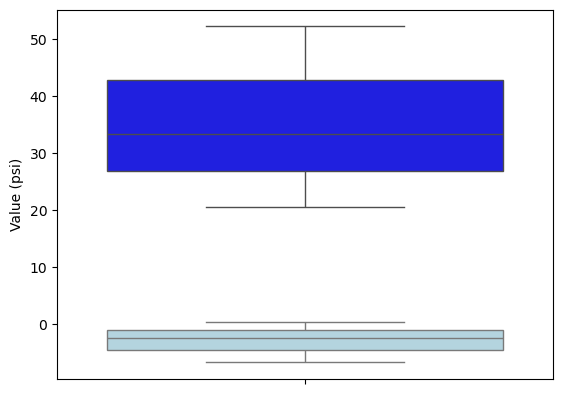

In [23]:
mask_grt_100 = df_60_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_60_70 = mask_grt_100.sum()
mask_lte_100 = df_60_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_60_70 = mask_lte_100.sum()

mph_60_70_boost_mean =df_60_70['Boost (psi)'].mean().round(2) 
mph_60_70_boost_quantiles=df_60_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_60_70_boost_quantiles = pd.DataFrame(mph_60_70_boost_quantiles)
df_60_70_boost_quantiles = df_60_70_boost_quantiles.reset_index()
df_60_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_60_70_count=len(df_60_70)
mpg_60_70_mpg_mean=df_60_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_60_70_100_quantiles=df_60_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_60_70_100_per=((mpg_grt_100_60_70/mpg_60_70_count)*100).round(2)
df_60_70_100_quantiles = pd.DataFrame(mpg_60_70_100_quantiles)
df_60_70_100_quantiles = df_60_70_100_quantiles.reset_index()
df_60_70_100_quantiles.columns = ['Percentile', '60-70mph (mpg)']

print("60-70mph")
print(f"Average Boost: {mph_60_70_boost_mean}")
print(f"Value Counts: {mpg_60_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_60_70}")
print(f"Values <= 100mpg: {mpg_lte_100_60_70}")
print(f"Percent above 100mpg: {mpg_60_70_100_per}%")
print(f"Mean MPG: {mpg_60_70_mpg_mean}")
print("mpg Quartiles")
print(df_60_70_100_quantiles)
print("Boost Quartiles")
print(df_60_70_boost_quantiles)
sns.boxplot(y=df_60_70_boost_quantiles['Value (psi)'], color='lightblue')
sns.boxplot(y=df_60_70_100_quantiles['60-70mph (mpg)'], color='blue')

Greater Than 70mph
Average Boost: -3.5
Value Counts: 312
Values > 100mpg: 39
Values <= 100mpg: 273
Percent above 100mpg: 12.5%
Mean MPG: 44.58
mpg Quartiles
   Percentile  Greater than 70mph (mpg)
0        0.25                     21.40
1        0.50                     32.55
2        0.75                     50.10
Boost Quartiles
   Percentile  Value (psi)
0        0.25        -6.80
1        0.50        -2.95
2        0.75         0.00


<Axes: ylabel='Greater than 70mph (mpg)'>

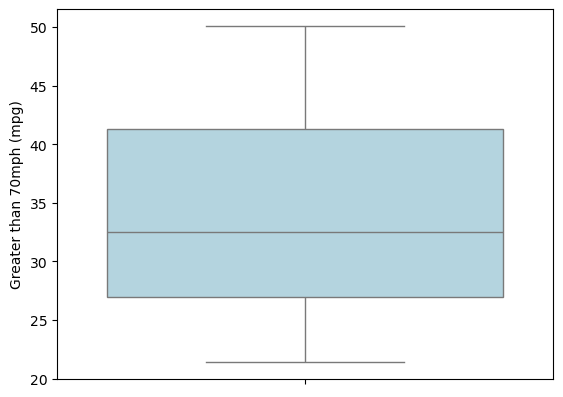

In [24]:
mask_grt_100 = df_grt_70['Instant fuel economy (MPG)'] > 100
mpg_grt_100_grt_70 = mask_grt_100.sum()
mask_lte_100 = df_grt_70['Instant fuel economy (MPG)']  <= 100
mpg_lte_100_grt_70 = mask_lte_100.sum()

mph_grt_70_boost_mean =df_grt_70['Boost (psi)'].mean().round(2) 
mph_grt_70_boost_quantiles=df_grt_70['Boost (psi)'].quantile([0.25,0.50,0.75])
df_grt_70_boost_quantiles = pd.DataFrame(mph_grt_70_boost_quantiles)
df_grt_70_boost_quantiles = df_grt_70_boost_quantiles.reset_index()
df_grt_70_boost_quantiles.columns = ['Percentile', 'Value (psi)']

mpg_grt_70_count=len(df_grt_70)
mpg_grt_70_mpg_mean=df_grt_70['Instant fuel economy (MPG)'].mean().round(2)
mpg_grt_70_100_quantiles=df_grt_70['Instant fuel economy (MPG)'].quantile([0.25,0.50,0.75])
mpg_grt_70_100_per=((mpg_grt_100_grt_70/mpg_grt_70_count)*100).round(2)
df_grt_70_100_quantiles = pd.DataFrame(mpg_grt_70_100_quantiles)
df_grt_70_100_quantiles = df_grt_70_100_quantiles.reset_index()
df_grt_70_100_quantiles.columns = ['Percentile', 'Greater than 70mph (mpg)']

print("Greater Than 70mph")
print(f"Average Boost: {mph_grt_70_boost_mean}")
print(f"Value Counts: {mpg_grt_70_count}")
print(f"Values > 100mpg: {mpg_grt_100_grt_70}")
print(f"Values <= 100mpg: {mpg_lte_100_grt_70}")
print(f"Percent above 100mpg: {mpg_grt_70_100_per}%")
print(f"Mean MPG: {mpg_grt_70_mpg_mean}")
print("mpg Quartiles")
print(df_grt_70_100_quantiles)
print("Boost Quartiles")
print(df_grt_70_boost_quantiles)
sns.boxplot(y=df_grt_70_100_quantiles['Greater than 70mph (mpg)'], color='lightblue')

In [25]:
mpg_count_list=[mpg_40_50_count, mpg_50_60_count, mpg_60_70_count, mpg_grt_70_count]
mpg_lte_100_count_list = [int(mpg_lte_100_40_50), int(mpg_lte_100_50_60), int(mpg_lte_100_60_70), int(mpg_lte_100_grt_70)]
mpg_grt_100_count_list = [int(mpg_grt_100_40_50), int(mpg_grt_100_50_60), int(mpg_grt_100_60_70), int(mpg_grt_100_grt_70)]
mpg_grt_100_per_list=[int(mpg_40_50_100_per),int(mpg_50_60_100_per),int(mpg_60_70_100_per),int(mpg_grt_70_100_per)]

mpg_100_df = pd.DataFrame({
    'total mpg counts': mpg_count_list,
    'total mpg <= 100 counts': mpg_lte_100_count_list,
    'total mpg > 100 counts': mpg_grt_100_count_list,
    '% > 100mpg':mpg_grt_100_per_list
}, index=['40-50mph', '50-60mph', '60-70mph', '>70mph'])

print(f'total mpg counts: {mpg_count_list}')
print(f'total mpg <= 100 counts: {mpg_lte_100_count_list}')
print(f'total mpg > 100 counts: {mpg_grt_100_count_list}')
print(f'% > 100mpg : {mpg_grt_100_per_list}')
mpg_100_df.head()

total mpg counts: [14, 45, 1308, 312]
total mpg <= 100 counts: [7, 29, 1143, 273]
total mpg > 100 counts: [7, 16, 165, 39]
% > 100mpg : [50, 35, 12, 12]


,total mpg counts,total mpg <= 100 counts,total mpg > 100 counts,% > 100mpg
40-50mph,14,7,7,50
50-60mph,45,29,16,35
60-70mph,1308,1143,165,12
>70mph,312,273,39,12


   Percentile  40-50mph (mpg)  50-60mph (mpg)  60-70mph (mpg)  \
0        0.25            8.15            13.3           20.50   
1        0.50           88.80            44.1           33.25   
2        0.75          146.20           127.5           52.20   

   Greater than 70mph (mpg)  
0                     21.40  
1                     32.55  
2                     50.10  


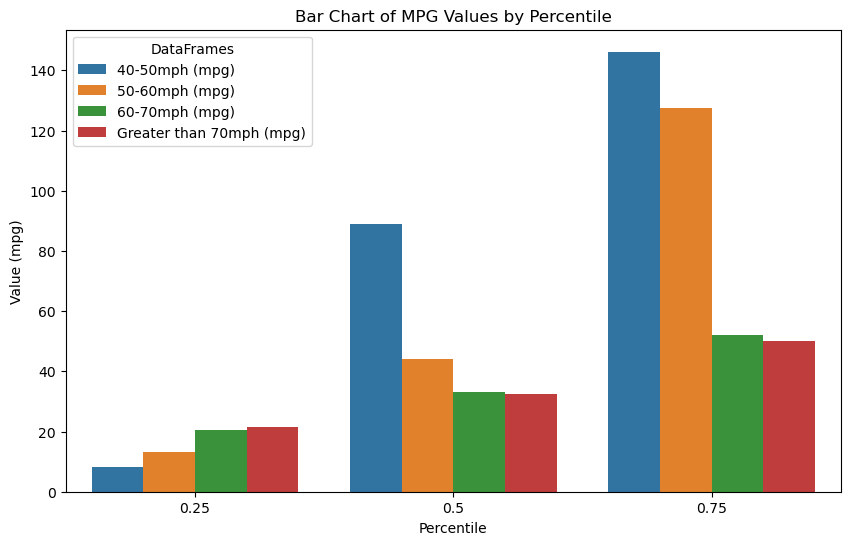

In [26]:
# Merge DataFrames on 'Percentile'
df_quartiles = pd.merge(df_40_50_100_quantiles, df_50_60_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_60_70_100_quantiles, on='Percentile')
df_quartiles = pd.merge(df_quartiles, df_grt_70_100_quantiles, on='Percentile')
df_quartiles.head()
print(df_quartiles)

df_long = pd.melt(df_quartiles, id_vars='Percentile', var_name='DataFrame', value_name='Value (mpg)')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Percentile', y='Value (mpg)', hue='DataFrame')
plt.title('Bar Chart of MPG Values by Percentile')
plt.xlabel('Percentile')
plt.ylabel('Value (mpg)')
plt.legend(title='DataFrames')
mpg_by_mph_file_path = os.path.join(output_folder_path, 'mpg_by_mph.jpeg')
plt.savefig(mpg_by_mph_file_path, format='jpeg', dpi=300)
plt.show()

In [27]:
df
#convert 
#df_less_10_geo=df_less_10.copy()
#df_less_10_geo.head()
#
#df_10_20_geo = df_10_20.copy()
#df_10_20_geo.head()
#
#df_20_30_geo = df_20_30.copy()
#df_20_30_geo.head()
#
#df_30_40_geo = df_30_40.copy()
#df_30_40_geo.head()
#
#df_40_50_geo = df_40_50.copy()
#df_40_50_geo.head()
#
#df_50_60_geo = df_50_60.copy()
#
#
#df_60_70_geo = df_60_70.copy()

df_55_75_geo = df_55_75.copy()





In [28]:
#map_center = [df_60_70['latitude'].mean(), df_60_70['longitude'].mean()]
#print(map_center)

In [29]:
print("Available colormaps:")
for name in dir(cm):
    if 'colormap' in name.lower():
        print(name)

Available colormaps:
ColorMap
LinearColormap
StepColormap
_LinearColormaps
_StepColormaps


In [30]:
df_map=df_moving.copy()
map_center = [44.980164, -93.185692]
m = folium.Map(location=map_center, zoom_start=11)
coordinates = df_map[['latitude', 'longitude', 'Vehicle speed (MPH)']].values.tolist()
sorted_coordinates = sorted(coordinates, key=lambda x: x[2])
colormap = cm.LinearColormap(
    colors=['blue', 'green', 'yellow', 'red'],  # Custom color range
    vmin=df_map['Vehicle speed (MPH)'].min(),
    vmax=df_map['Vehicle speed (MPH)'].max(),
    caption='Vehicle Speed (MPH)'   
)

colormap.add_to(m)



for i in range(len(df_map) - 1):
    # Coordinates of the current segment
    start = [df_map.iloc[i]['latitude'], df_map.iloc[i]['longitude']]
    end = [df_map.iloc[i + 1]['latitude'], df_map.iloc[i + 1]['longitude']]
    
    # Value for color mapping (use average or a specific value)
    segment_value = (df_map.iloc[i]['Vehicle speed (MPH)'] + df_map.iloc[i + 1]['Vehicle speed (MPH)']) / 2
    
    # Create and add a PolyLine for each segment
    folium.PolyLine(
        locations=[start, end],
        color=colormap(segment_value),  # Map value to color
        weight=5,
        opacity=1
        ).add_to(m)

# Save the map to an HTML file
map_moving_file_path = os.path.join(output_folder_path, 'map_moving.html')
m.save(map_moving_file_path)


In [31]:
#map_center = [44.980164, -93.185692]
#m = folium.Map(location=map_center, zoom_start=11)
#
#
## Prepare the list of coordinates for the PolyLine
#coordinates = df_55_75_geo[['latitude', 'longitude']].values.tolist()
#
## Add a PolyLine to the map
#folium.PolyLine(
#    locations=coordinates,
#    popup=[str(row['Time (sec)']) for idx, row in df_55_75_geo.iterrows()],
#    weight=5,
#    opacity=1,
#    color='blue'
#).add_to(m)

# Save the map to an HTML file
m.save('mpg_55_75_map.html')

In [32]:
hvexplorer = df.hvplot.explorer()
hvexplorer

/Users/matthewidle/anaconda3/envs/py311/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


BokehModel(combine_events=True, render_bundle={'docs_json': {'7ef0977e-42d4-47b7-a4bc-c7ef9e06c367': {'version…

In [33]:
df['Engine RPM (RPM)']=df['Engine RPM (RPM)']/100
df['Engine Power (hp)']=df['Engine Power (hp)']/10
df['Ambient air temperature (°F)']=df['Ambient air temperature (°F)']/10
#df['Intake air temperature bank 1  sensor 1 (°F)']=df['Intake air temperature bank 1  sensor 1 (°F)']/10
#df['Relative throttle position (%)']=df['Relative throttle position (%)']/10
#df[' Boost (psi)']=df[' Boost (psi)']/10
#df[' Mass air flow rate (lb/min)']=df[' Mass air flow rate (lb/min)']/10


#df['Boost (psi)']= df['Boost (psi)']/10


In [34]:
start_index = int(round(2227.003))  # or use int(2227.003)
end_index = int(round(2231.996))    # or use int(2255.994)

# Select rows between start_index and end_index (inclusive)
boosted = df.iloc[start_index:end_index + 1]

print(boosted.head())

Empty DataFrame
Columns: [Time (sec), Vehicle speed (MPH), Relative accelerator pedal position (%), Engine RPM (RPM), Boost (psi), Engine Power (hp), Mass air flow rate (lb/min), Intake manifold absolute pressure (inHg), Ambient air temperature (°F), Trip Distance (miles), Instant fuel economy (MPG), Trip Fuel Economy (MPG), Latitude (deg), Longitude (deg), Relative throttle position (%)]
Index: []


In [35]:
#boosted=df.iloc[2227:2233]
#boosted.head

In [36]:
boosted.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Engine RPM (RPM)','Boost (psi)','Relative throttle position (%)','Vehicle speed (MPH)' ], #'Engine Power (hp)'
    legend='bottom_right',
    widget_location='bottom',
)

BokehModel(combine_events=True, render_bundle={'docs_json': {'2513eef6-f1cc-40d4-bf35-118abffb64fc': {'version…

In [37]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/Boost'],
    legend='bottom_right',
    widget_location='bottom',
)

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Mass Air/Boost']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y=['Mass Air/manPress'],
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
df.hvplot(
    kind='line',
    x='Time (sec)',
    y1='Intake air temperature bank 1  sensor 1 (°F)',
    y2='Boost (psi)',
    legend='bottom_right',
    widget_location='bottom',
)

In [ ]:
moving_df.describe()